In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import datetime
import seaborn as sns

In [3]:
data=pd.read_excel('onlineretail.xlsx')

In [4]:
data.shape

(541909, 8)

In [5]:
data.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
data.dropna(inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [12]:
Q3=data.Quantity.quantile(0.95)
Q1=data.Quantity.quantile(0.05)
print(Q1," ",Q3)

1.0   36.0


* Seem to be showing some transactions with negative quantites

In [502]:
data.loc[data.Quantity<=0,:]

InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

               InvoiceDate  UnitPrice  CustomerID         Country  
141    2010-12-01 09:41:00      27.50     14527.0  United Kingdom  
154    2010-12-01 09:49:00       4.65     15311.0  United Kingdom  
235    2010-12-01 10:24:00       1.65     17548.0  United Kingdom  
236    2010-12-01 10:24:00       0.29     17548.0  United Kingdom  
237    2010-12-01 10:24:00       0.29     17548.0  United Kingdom  
...                    ...        ...         ...             ...  
540449 2011-12-09 09:57:00       0.83     14397.0  United Kingdom  
541541 2011-12-09 10:28:00     224.69     15498.0  United Kingdom  
541715 2011-12-09 11:57:00      10.95     15311.0  United Kingdom  
541716 2011-12-09 11:58:00       1.25     17315.0  United Kingdom  
541717 2011-12-09 11:58:00       1.25     17315.0  United Kingdom  

[8905 rows x 8 columns]

* The quantities less than 0 look like some sort of returns
* For this purpose lets take out the returns

In [503]:
data.loc[data.Quantity>1000,:].count()

InvoiceNo      106
StockCode      106
Description    106
Quantity       106
InvoiceDate    106
UnitPrice      106
CustomerID     106
Country        106
dtype: int64

* These transactions look like outliers as well
* Eliminate them from the analysis and we can revisit later

In [504]:
sales=data.loc[(data.Quantity>=0)&(data.Quantity<1000),:].copy()

In [505]:
sales.shape

(397808, 8)

In [506]:
sales['CustomerID']=sales.CustomerID.astype(int)

In [507]:
sales.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55       17850  United Kingdom  
1 2010-12-01 08:26:00       3.39       17850  United Kingdom  
2 2010-12-01 08:26:00       2.75       17850  United Kingdom  
3 2010-12-01 08:26:00       3.39       17850  United Kingdom  
4 2010-12-01 08:26:00       3.39       17850  United Kingdom

In [508]:
sales['CustomerID']=sales.CustomerID.astype(str)

In [509]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397808 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397808 non-null  object        
 1   StockCode    397808 non-null  object        
 2   Description  397808 non-null  object        
 3   Quantity     397808 non-null  int64         
 4   InvoiceDate  397808 non-null  datetime64[ns]
 5   UnitPrice    397808 non-null  float64       
 6   CustomerID   397808 non-null  object        
 7   Country      397808 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.3+ MB


In [510]:
sales.sort_values(by=['CustomerID','InvoiceDate'],inplace=True)

In [511]:
first_sale=sales.groupby('CustomerID')['InvoiceDate'].first()

In [512]:
last_sale=sales.groupby('CustomerID')['InvoiceDate'].last()

In [513]:
sale_date=pd.concat([first_sale,last_sale],axis=1)

In [514]:
sale_date.columns=['first_sale','last_sale']

In [515]:
sale_date['tenure']=(sale_date.last_sale-sale_date.first_sale).dt.days

In [516]:
sale_date.head()

first_sale           last_sale  tenure
CustomerID                                                
12347      2010-12-07 14:57:00 2011-12-07 15:52:00     365
12348      2010-12-16 19:09:00 2011-09-25 13:13:00     282
12349      2011-11-21 09:51:00 2011-11-21 09:51:00       0
12350      2011-02-02 16:01:00 2011-02-02 16:01:00       0
12352      2011-02-16 12:33:00 2011-11-03 14:37:00     260

In [517]:
sale_date['datecomp']=datetime.datetime.strptime('2012-01-01','%Y-%m-%d')

In [518]:
sale_date['recency']=(sale_date.datecomp-sale_date.last_sale).dt.days

In [519]:
sale_date.head()

first_sale           last_sale  tenure   datecomp  recency
CustomerID                                                                    
12347      2010-12-07 14:57:00 2011-12-07 15:52:00     365 2012-01-01       24
12348      2010-12-16 19:09:00 2011-09-25 13:13:00     282 2012-01-01       97
12349      2011-11-21 09:51:00 2011-11-21 09:51:00       0 2012-01-01       40
12350      2011-02-02 16:01:00 2011-02-02 16:01:00       0 2012-01-01      332
12352      2011-02-16 12:33:00 2011-11-03 14:37:00     260 2012-01-01       58

In [520]:
freq=sales.groupby('CustomerID')['InvoiceNo'].count()

In [521]:
sale_date['freq']=freq

In [522]:
sales['Monetaryval']=sales.Quantity*sales.UnitPrice

In [523]:
Mval=sales.groupby('CustomerID')['Monetaryval'].sum()

In [524]:
sale_date['Mval']=Mval

In [525]:
sale_date

first_sale           last_sale  tenure   datecomp  \
CustomerID                                                              
12347      2010-12-07 14:57:00 2011-12-07 15:52:00     365 2012-01-01   
12348      2010-12-16 19:09:00 2011-09-25 13:13:00     282 2012-01-01   
12349      2011-11-21 09:51:00 2011-11-21 09:51:00       0 2012-01-01   
12350      2011-02-02 16:01:00 2011-02-02 16:01:00       0 2012-01-01   
12352      2011-02-16 12:33:00 2011-11-03 14:37:00     260 2012-01-01   
...                        ...                 ...     ...        ...   
18280      2011-03-07 09:52:00 2011-03-07 09:52:00       0 2012-01-01   
18281      2011-06-12 10:53:00 2011-06-12 10:53:00       0 2012-01-01   
18282      2011-08-05 13:35:00 2011-12-02 11:43:00     118 2012-01-01   
18283      2011-01-06 14:14:00 2011-12-06 12:02:00     333 2012-01-01   
18287      2011-05-22 10:39:00 2011-10-28 09:29:00     158 2012-01-01   

            recency  freq     Mval  
CustomerID                          
12347            24   182  4310.00  
12348            97    31  1797.24  
12349            40    73  1757.55  
12350           332    17   334.40  
12352            58    85  2506.04  
...             ...   ...      ...  
18280           299    10   180.60  
18281           202     7    80.82  
18282            29    12   178.05  
18283            25   756  2094.88  
18287            64    70  1837.28  

[4331 rows x 7 columns]

In [557]:
select_df=sale_date.loc[:,['recency','freq','Mval']].copy()

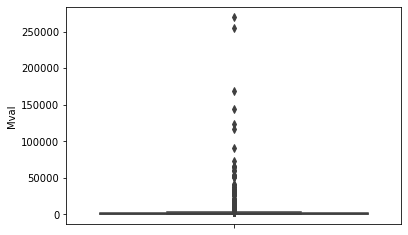

In [558]:
sns.boxplot(y='Mval',data=select_df,orient='v')
Q1=select_df.Mval.quantile(0.05)
Q3=select_df.Mval.quantile(0.95)
IQR=Q3-Q1
select_df=select_df.loc[select_df.Mval<=(Q3+1.5*IQR),:]

In [559]:
X=StandardScaler().fit_transform(select_df)

In [560]:
ssd=[]
K=range(1,10)
for k in K:
    model=KMeans(n_clusters=k)
    model.fit(X)
    ssd.append(model.inertia_)

Text(0.5, 1.0, 'Elbow plot')

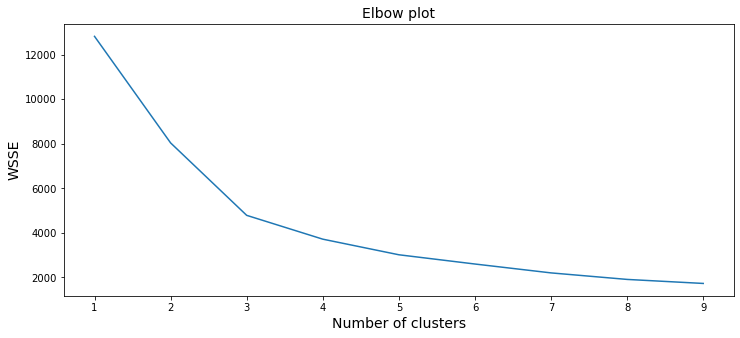

In [561]:
plt.figure(figsize=(12,5))
plt.plot(K,ssd)
plt.xlabel('Number of clusters',fontsize=14)
plt.ylabel('WSSE',fontsize=14)
plt.title('Elbow plot',fontsize=14)

* There is a definite elbow at K=3. The improvement in the Within Cluster Sum of Squares Errors(WSSE) drops off at K=3
* There is an elbow at k=5 as well, just not as steep

In [562]:
model=KMeans(n_clusters=4)
model.fit(X)

KMeans(n_clusters=4)

In [563]:
centers=model.cluster_centers_

In [564]:
select_df['labels']=model.labels_

In [565]:
select_df.reset_index(inplace=True)

In [566]:
select_df.groupby('labels')['CustomerID','freq','Mval','recency'].agg({'CustomerID':'count','freq':'mean','Mval':'mean','recency':'mean'})

C:\Users\gaura\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


CustomerID        freq         Mval     recency
labels                                                 
0             2415   47.925880   768.054896   70.680745
1             1029   26.376093   432.157688  273.084548
2              680  194.038235  3296.748735   51.011765
3              149  489.033557  8022.153624   36.986577

* Cluster 3 orders most freq, has the highest value and is the most recent-->Platinum
* Cluster 2 orders little less frequently, slightly lower value than 3,little less recent-->Gold
* Cluster 0 lower than 2 and 3 on all 3 metrics--> Silver
* Cluster 1 very infrequent shoppers--> Bronze

In [569]:
select_df['Segment']=select_df.labels.map({0:'Silver',1:'Bronze',2:'Gold',3:'Platinum'})

In [571]:
segment_summary=select_df.groupby('Segment')['CustomerID','freq','Mval','recency'].agg({'CustomerID':'count','freq':'mean','Mval':'mean','recency':'mean'})

C:\Users\gaura\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [574]:
segment_summary.round(0).sort_values(by=['Mval','recency','freq'])

CustomerID   freq    Mval  recency
Segment                                     
Bronze          1029   26.0   432.0    273.0
Silver          2415   48.0   768.0     71.0
Gold             680  194.0  3297.0     51.0
Platinum         149  489.0  8022.0     37.0